# Where is your nearest love?

## A geospatial celebration of Valentine's day

The following Notebook filters data drawn from the [US Domestic Geographic Names Database](https://www.usgs.gov/core-science-systems/ngp/board-on-geographic-names/download-gnis-data). Scripts filter geographic point features with names containing variations of Valentine's Day-related strings such as "love" and "heart."

In [1]:
# import libraries
import pandas as pd
import geopandas as gpd
import pysal

/Users/NewMaps/miniconda3/envs/love/lib/python3.8/site-packages/pysal/explore/segregation/network/network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  warn(
/Users/NewMaps/miniconda3/envs/love/lib/python3.8/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
# request data
data_in = pd.read_csv('./data/NationalFile_20200101.txt', sep='|')
data_in.head()

,FEATURE_ID,FEATURE_NAME,FEATURE_CLASS,STATE_ALPHA,STATE_NUMERIC,COUNTY_NAME,COUNTY_NUMERIC,PRIMARY_LAT_DMS,PRIM_LONG_DMS,PRIM_LAT_DEC,PRIM_LONG_DEC,SOURCE_LAT_DMS,SOURCE_LONG_DMS,SOURCE_LAT_DEC,SOURCE_LONG_DEC,ELEV_IN_M,ELEV_IN_FT,MAP_NAME,DATE_CREATED,DATE_EDITED
0,399,Agua Sal Creek,Stream,AZ,4,Apache,1.0,362740N,1092842W,36.461112,-109.478439,362053N,1090915W,36.348058,-109.154266,1645.0,5397.0,Fire Dance Mesa,02/08/1980,NaN
1,400,Agua Sal Wash,Valley,AZ,4,Apache,1.0,363246N,1093103W,36.546112,-109.517607,362740N,1092842W,36.461112,-109.478439,1597.0,5239.0,Little Round Rock,02/08/1980,NaN
2,401,Aguaje Draw,Valley,AZ,4,Apache,1.0,343417N,1091313W,34.571428,-109.220370,344308N,1085826W,34.718800,-108.973900,1750.0,5741.0,Kearn Lake,02/08/1980,01/14/2008
3,402,Arlington State Wildlife Area,Park,AZ,4,Maricopa,13.0,331455N,1124625W,33.248655,-112.773504,NaN,NaN,NaN,NaN,231.0,758.0,Spring Mountain,02/08/1980,NaN
4,403,Bar X Wash,Stream,AZ,4,Graham,9.0,322815N,1095610W,32.470904,-109.936185,323048N,1095233W,32.513402,-109.875907,1339.0,4393.0,West of Greasewood Mountain,02/08/1980,NaN


In [3]:
# convert names to lowercase to simplify searching
data_in['FEATURE_NAME'] = data_in['FEATURE_NAME'].str.lower()

# create a new dataframe with rows containing desired string
love_df = data_in[data_in['FEATURE_NAME'].str.contains('love')]

In [4]:
# note most entries have non-null values for all data attributes 
# exceptions being source lat/lon values
love_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3106 entries, 2620 to 2285884
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FEATURE_ID       3106 non-null   int64  
 1   FEATURE_NAME     3106 non-null   object 
 2   FEATURE_CLASS    3106 non-null   object 
 3   STATE_ALPHA      3106 non-null   object 
 4   STATE_NUMERIC    3106 non-null   int64  
 5   COUNTY_NAME      3106 non-null   object 
 6   COUNTY_NUMERIC   3106 non-null   float64
 7   PRIMARY_LAT_DMS  3106 non-null   object 
 8   PRIM_LONG_DMS    3106 non-null   object 
 9   PRIM_LAT_DEC     3106 non-null   float64
 10  PRIM_LONG_DEC    3106 non-null   float64
 11  SOURCE_LAT_DMS   349 non-null    object 
 12  SOURCE_LONG_DMS  349 non-null    object 
 13  SOURCE_LAT_DEC   349 non-null    float64
 14  SOURCE_LONG_DEC  349 non-null    float64
 15  ELEV_IN_M        2999 non-null   float64
 16  ELEV_IN_FT       2999 non-null   float64
 17  MAP_NAME

In [5]:
# view names (note some like glover and clover are included though not targeted)
list(love_df['FEATURE_NAME'])

['clover camp',
 'clover creek',
 'clover spring tank',
 'clover tank',
 'lovers leap',
 'loves camp',
 'loves mine',
 'spendlove tank',
 'upper clover tank',
 'lovelace tank',
 'j w spendlove reservoir',
 'love',
 'cloverleaf',
 'camp clover ranger station',
 'clover canyon',
 'clover canyon',
 'clover creek',
 'clover creek',
 'clover point tank',
 'clover spring',
 'clover spring',
 'clover spring',
 'clover spring',
 'clover tank',
 'clover tank',
 'clover wash',
 'clover well',
 'cloverleaf ranch',
 'glove mine',
 'glover tank',
 'love lake',
 'clover spring',
 'clover flat tank',
 'clover spring',
 'clover flat tank number 2',
 'prescott regional airport - ernest a love field',
 'clover bend',
 'clover bend cemetery',
 'cloverdale ridge',
 'glover brake',
 'glover cemetery',
 'glover cemetery',
 'love cemetery',
 'love cemetery',
 'love creek',
 'love creek',
 'love hollow',
 'love rest cemetery',
 'slover creek',
 'true love bar',
 'lovelace cemetery',
 'love creek',
 'cloverdal

In [6]:
# how many of each feature class contain target word?
love_df['FEATURE_CLASS'].value_counts()

Church             510
Populated Place    330
School             304
Stream             251
Cemetery           231
Locale             211
Building           159
Post Office        104
Valley              98
Park                89
Reservoir           79
Summit              77
Lake                75
Civil               70
Dam                 68
Cliff               38
Spring              37
Mine                37
Airport             33
Canal               32
Island              26
Ridge               21
Bay                 18
Flat                17
Cape                17
Gap                 16
Bridge              15
Hospital            14
Census              14
Crossing            13
Well                11
Basin               11
Trail                9
Tower                9
Oilfield             8
Gut                  7
Swamp                6
Channel              6
Bend                 5
Bar                  4
Bench                4
Reserve              4
Beach                3
Falls      

In [7]:
# remove unuseful columns from DataFrame
love_df = love_df.drop(['FEATURE_ID', 'PRIMARY_LAT_DMS', 'PRIM_LONG_DMS', 'SOURCE_LAT_DMS', 'SOURCE_LONG_DMS', 'SOURCE_LAT_DEC', 'SOURCE_LONG_DEC', 'DATE_CREATED', 'DATE_EDITED'], axis=1)

In [8]:
# create a GeoDataFrame from the DataFrame
love_gdf = gpd.GeoDataFrame(love_df, geometry=gpd.points_from_xy(love_df.PRIM_LONG_DEC, love_df.PRIM_LAT_DEC))

# assign it a NAD83 coordinate system (drawn from the GNIS docs)
love_gdf.crs = "EPSG:4269"

# convert that coordinate system to WGS84
love_gdf.to_crs('EPSG:4326', inplace=True)

# verify
love_gdf.crs

'EPSG:4326'

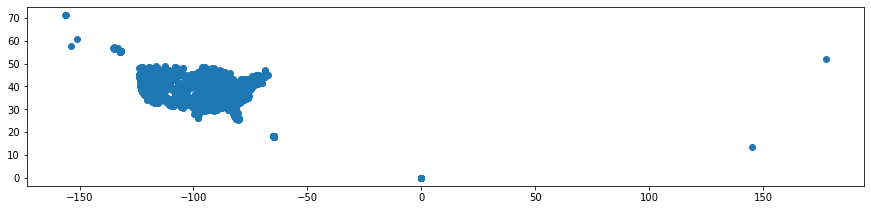

In [9]:
# give it a quick initial plot ... note outliers ...
love_gdf.plot(figsize=(15,10));

In [10]:
# can clean up, remove points outside of lat/lon range, for eample
love_gdf = love_gdf[love_gdf['PRIM_LONG_DEC'] < -61]

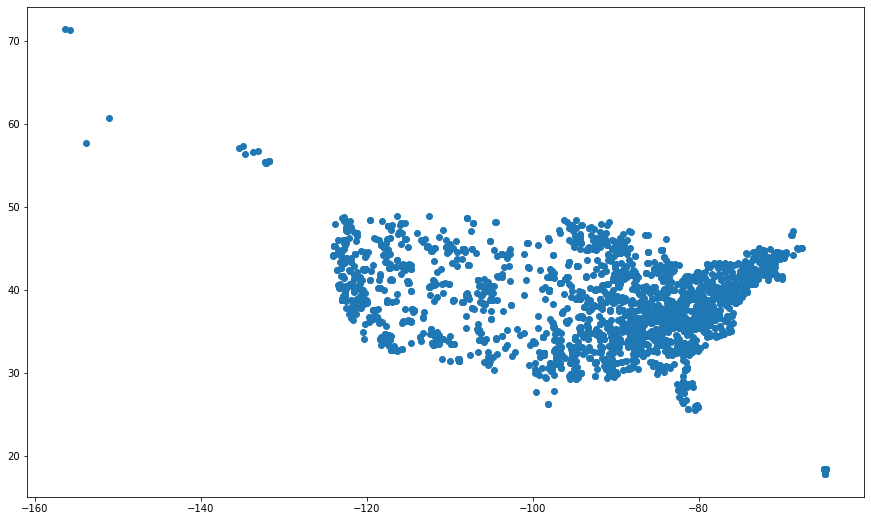

In [11]:
# sure, better
love_gdf.plot(figsize=(15,10));

In [12]:
# write points out to GeoJSON (could also do CSV)
love_gdf.to_file('./data/love_points.json', driver='GeoJSON')

In [13]:
# get a Series of the geometry Shapely Points
geoms = love_gdf.geometry

# get an array of these point values to use within PySal
points_arr = [list(geom.coords)[0] for geom in geoms]

# create a Voronoi polygon module from the points
regions_df, points_df = pysal.lib.cg.voronoi_frames(points_arr)

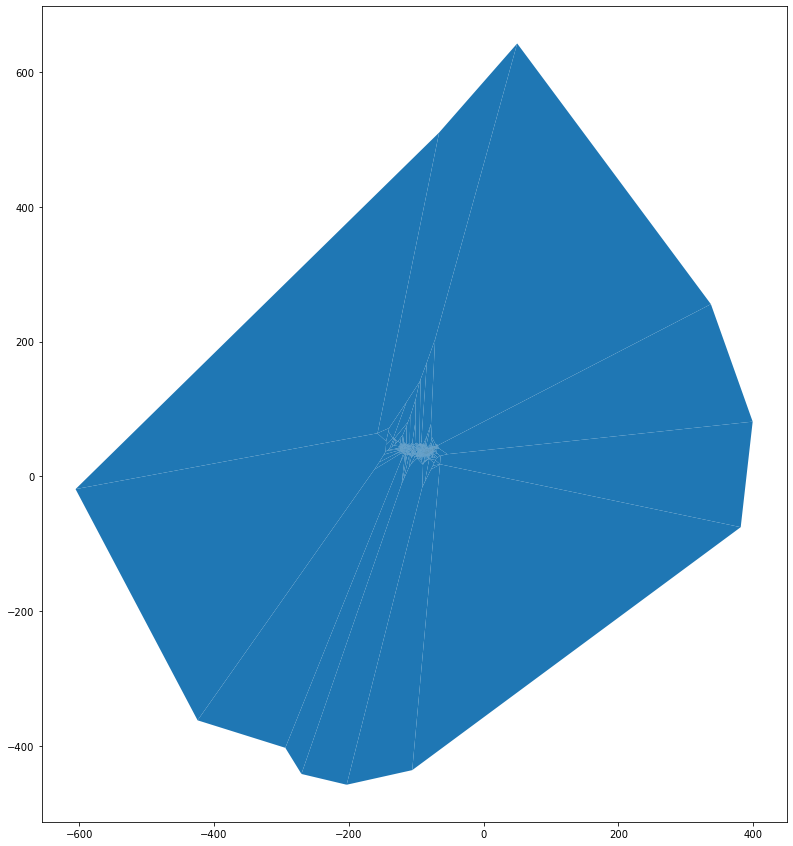

In [20]:
# plot the Voronoi polygons
regions_df.plot(figsize=(15,15))

In [22]:
# export the polys to GeoJSON
regions_df.to_file('./data/voronoi.json', driver='GeoJSON')